In [1]:
import numpy as np
import matplotlib.pyplot as plt
from HB_lattice import *
latt = HB_lattice(g_factor = 30)

3x3 square lattice with 18 bond length was constructed


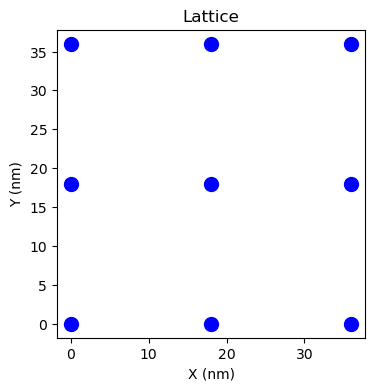

In [8]:
latt.create_lattice('square', 3, 18)
# latt.create_custom_lattice("coords.csv") #coordinates are given in nm!
latt.plot_lattice()

In [11]:
eigvals = []
b_field = np.linspace(0, 13, 100)
for b in b_field:
    latt.calculate_eigenvalues([-0.01], [0], b, add_peierls=True, add_zeeman=False)
    eigvals.append(latt.eigvals)


In [ ]:
latt.plot_dos(-0.04, 0.04, 0.0001)

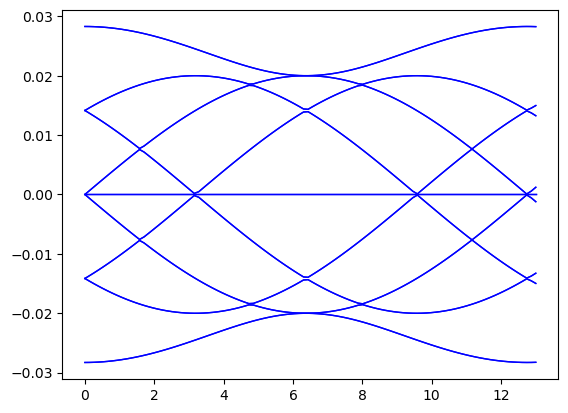

In [12]:
plt.plot(b_field, eigvals, color='Blue', linewidth=1)

In [ ]:
w